# **PROJETO CHUVA**
&emsp;&emsp; O modelo ARIMA (Auto-Regressivo Integrado de Médias Móveis) é uma extensão do modelo AR que vamos ver mais a frente. Além dos componentes autoregressivos (AR), incorpora elementos de média móvel (MA) e diferenciação (I). O termo ARIMA(p, d, q) denota o número de termos autoregressivos (p), o grau de diferenciação (d) e o número de termos de média móvel (q). No caso do modelo AR(p), temos ARIMA(p, 0, 0), indicando ausência de diferenciação e média móvel.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4

In [3]:
chuva = pd.read_csv('/content/drive/MyDrive/Cursos_Udemy/series_temporais_PYTHON/chuva_tratado.csv',
                    sep=',')

In [ ]:
chuva

## **Criação da Série**

In [4]:
chuva2 = chuva.drop(columns='Ano')
chuva2.head()

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,184.9,242.9,230.0,59.0,126.2,14.6,4.0,21.80,126.1,71.1,111.3,155.2
1,199.6,221.0,218.7,106.5,113.1,3.9,30.3,27.85,34.5,60.7,242.5,389.9
2,525.8,249.3,161.3,98.1,293.8,183.9,11.8,30.90,80.2,84.8,72.7,152.1
3,268.7,224.4,189.2,175.1,224.9,58.6,1.3,0.20,28.4,173.9,100.2,289.8
4,312.9,344.3,288.2,66.3,21.7,52.5,150.1,32.90,52.1,80.1,88.0,236.7


In [5]:
# Transformar em Array???
chuva3 = chuva2.values
chuva3

array([[1.8490e+02, 2.4290e+02, 2.3000e+02, 5.9000e+01, 1.2620e+02,
        1.4600e+01, 4.0000e+00, 2.1800e+01, 1.2610e+02, 7.1100e+01,
        1.1130e+02, 1.5520e+02],
       [1.9960e+02, 2.2100e+02, 2.1870e+02, 1.0650e+02, 1.1310e+02,
        3.9000e+00, 3.0300e+01, 2.7850e+01, 3.4500e+01, 6.0700e+01,
        2.4250e+02, 3.8990e+02],
       [5.2580e+02, 2.4930e+02, 1.6130e+02, 9.8100e+01, 2.9380e+02,
        1.8390e+02, 1.1800e+01, 3.0900e+01, 8.0200e+01, 8.4800e+01,
        7.2700e+01, 1.5210e+02],
       [2.6870e+02, 2.2440e+02, 1.8920e+02, 1.7510e+02, 2.2490e+02,
        5.8600e+01, 1.3000e+00, 2.0000e-01, 2.8400e+01, 1.7390e+02,
        1.0020e+02, 2.8980e+02],
       [3.1290e+02, 3.4430e+02, 2.8820e+02, 6.6300e+01, 2.1700e+01,
        5.2500e+01, 1.5010e+02, 3.2900e+01, 5.2100e+01, 8.0100e+01,
        8.8000e+01, 2.3670e+02],
       [2.8410e+02, 1.9690e+02, 3.1010e+02, 8.5800e+01, 7.7900e+01,
        5.0600e+01, 1.2120e+02, 7.6300e+01, 9.7200e+01, 2.0680e+02,
        1.1630e+02,

In [6]:
# Transformar em lista
chuva4 = list(chuva3.flatten())
print(chuva4)

[184.9, 242.9, 230.0, 59.0, 126.2, 14.6, 4.0, 21.8, 126.1, 71.1, 111.3, 155.2, 199.6, 221.0, 218.7, 106.5, 113.1, 3.9, 30.3, 27.85, 34.5, 60.7, 242.5, 389.9, 525.8, 249.3, 161.3, 98.1, 293.8, 183.9, 11.8, 30.9, 80.2, 84.8, 72.7, 152.1, 268.7, 224.4, 189.2, 175.1, 224.9, 58.6, 1.3, 0.2, 28.4, 173.9, 100.2, 289.8, 312.9, 344.3, 288.2, 66.3, 21.7, 52.5, 150.1, 32.9, 52.1, 80.1, 88.0, 236.7, 284.1, 196.9, 310.1, 85.8, 77.9, 50.6, 121.2, 76.3, 97.2, 206.8, 116.3, 149.8, 330.7, 340.3, 522.4, 200.3, 43.3, 96.8, 28.2, 37.3, 101.4, 168.0, 67.3, 237.9, 129.2, 258.5, 227.97, 87.2, 93.5, 11.6, 40.9, 24.7, 150.6, 219.6, 145.04, 211.7, 221.5, 225.7, 110.0, 84.6, 133.9, 74.7, 11.2, 40.8, 210.1, 134.1, 125.5, 170.5, 196.9, 184.4, 231.6, 111.4, 54.9, 30.5, 39.2, 2.4, 1.8, 147.6, 86.6, 276.3, 373.8, 383.1, 267.7, 73.9, 79.7, 31.2, 46.8, 1.5, 44.2, 202.6, 115.1, 236.04, 334.3, 376.5, 284.5, 42.3, 21.7, 45.1, 12.2, 41.2, 179.4, 179.8, 87.4, 243.9, 235.0, 187.6, 57.1, 63.2, 88.2, 124.7, 12.5, 28.8, 118.0, 

In [7]:
indice = pd.date_range('1985', periods = len(chuva4), freq = 'M')
indice

DatetimeIndex(['1985-01-31', '1985-02-28', '1985-03-31', '1985-04-30',
               '1985-05-31', '1985-06-30', '1985-07-31', '1985-08-31',
               '1985-09-30', '1985-10-31',
               ...
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', length=432, freq='M')

In [8]:
serie = pd.Series(chuva4, index = indice)
serie

1985-01-31    184.90
1985-02-28    242.90
1985-03-31    230.00
1985-04-30     59.00
1985-05-31    126.20
               ...  
2020-08-31     62.10
2020-09-30     22.90
2020-10-31    213.90
2020-11-30    162.10
2020-12-31    236.04
Freq: M, Length: 432, dtype: float64

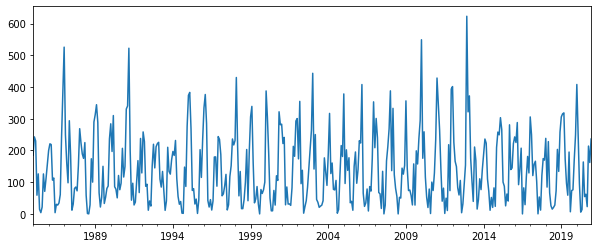

In [9]:
serie.plot()
plt.show()

## **Análise e Preparação da Série**

### **Média Móvel**

In [10]:
media_movel = serie.rolling(window=6)
media_movel = media_movel.mean()

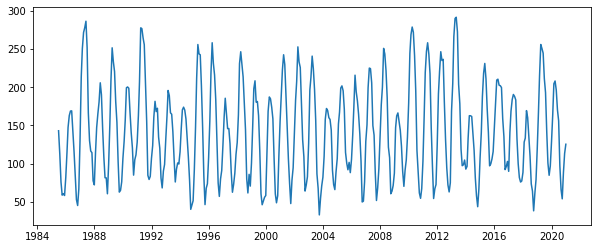

In [11]:
plt.plot(media_movel);

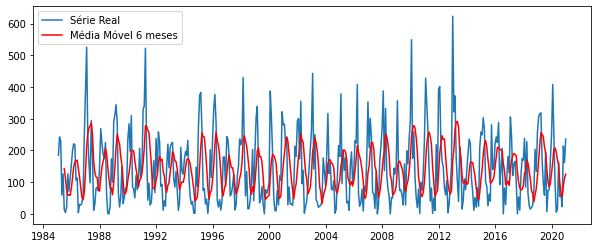

In [12]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel,color='red', label='Média Móvel 6 meses')
plt.legend(loc='best')
plt.show()

**Decomposição**

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
decomposicao = seasonal_decompose(serie)

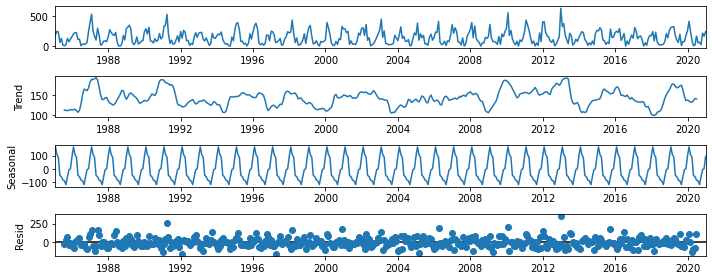

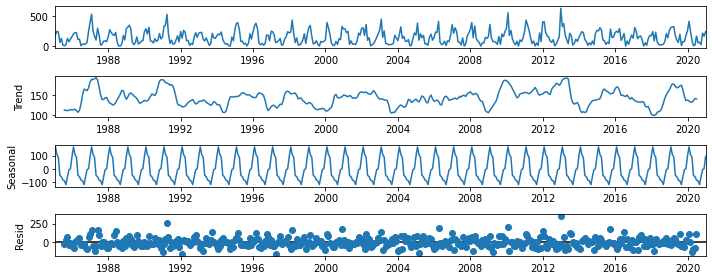

In [15]:
decomposicao.plot()

### **Normalidade e Transformação**

In [16]:
import scipy.stats as stats

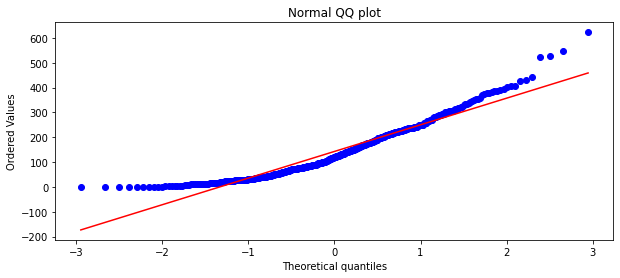

In [17]:
stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05

In [18]:
e, p = stats.shapiro(serie)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9260316491127014
p-valor: 9.107363301008586e-14


In [19]:
# Transformação por log (Diminuir variância e melhorar normalidade)
serie2 = np.log(serie)
serie2

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1985-01-31    5.219815
1985-02-28    5.492650
1985-03-31    5.438079
1985-04-30    4.077537
1985-05-31    4.837868
                ...   
2020-08-31    4.128746
2020-09-30    3.131137
2020-10-31    5.365509
2020-11-30    5.088213
2020-12-31    5.464001
Freq: M, Length: 432, dtype: float64

In [20]:
e, p = stats.shapiro(serie2)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: nan
p-valor: 1.0


In [21]:
# Transformação por raiz cúbica (quando possui dados com valor zero ou negativos)
serie3 = np.sign(serie)*abs(serie)**(1/3)
serie3

1985-01-31    5.696992
1985-02-28    6.239395
1985-03-31    6.126926
1985-04-30    3.892996
1985-05-31    5.015949
                ...   
2020-08-31    3.960018
2020-09-30    2.839739
2020-10-31    5.980492
2020-11-30    5.452483
2020-12-31    6.180096
Freq: M, Length: 432, dtype: float64

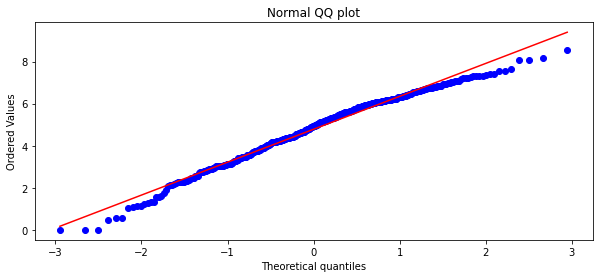

In [22]:
stats.probplot(serie3, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [23]:
e, p =stats.shapiro(serie3)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9826489090919495
p-valor: 4.832631748286076e-05


<ipython-input-24-8dca997318d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie);


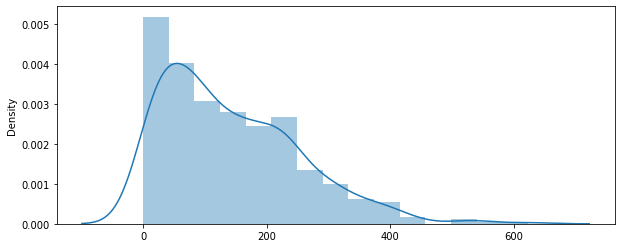

In [24]:
import seaborn as sns
sns.distplot(serie);

<ipython-input-25-90340621ff30>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie3);


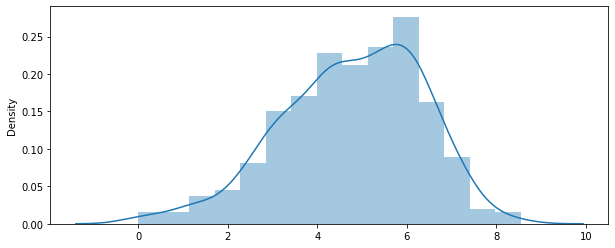

In [25]:
sns.distplot(serie3);

In [26]:
# Posso tentar mais vezes???? Não é recomendado, pois não adianta.
serie4 = (serie3)**(1/3)
serie4

1985-01-31    1.786002
1985-02-28    1.840973
1985-03-31    1.829845
1985-04-30    1.573118
1985-05-31    1.711792
                ...   
2020-08-31    1.582094
2020-09-30    1.416096
2020-10-31    1.815149
2020-11-30    1.760076
2020-12-31    1.835123
Freq: M, Length: 432, dtype: float64

### **Estacionaridade**

In [27]:
import statsmodels.tsa.stattools

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ho = não é estacionário: estatística do teste > valor crítico

Ha = é estacionário:  estatística do teste < valor crítico

In [28]:
kpss = statsmodels.tsa.stattools.kpss(serie3)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0199
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [29]:
# Caso não fosse estacionária poderia tentar fazer a diferenciação:
# serie5 = np.diff(serie3)

### **Autocorrelação**

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

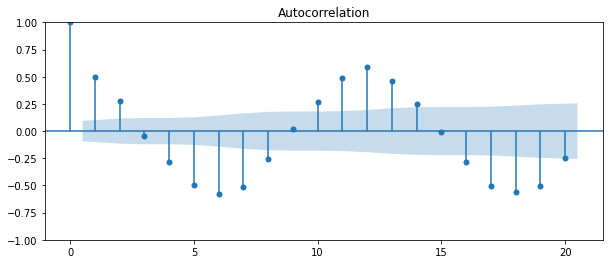

In [31]:
plot_acf(serie3, lags=20)
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


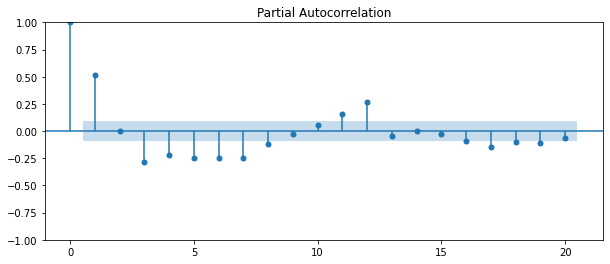

In [32]:
plot_pacf(serie, lags=20)
plt.show()

A série é autocorrelacionada, mas não tem problema, pois esse é um pressuposto da análise dos resíduos dos modelos de séries temporais.

## **Modelo AR**

Modelo arima:(p,d,q)

Modelo ar: (p,0,0)

In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [38]:
modelo_ar = ARIMA(serie3, order = (9,0,0))

In [39]:
resultado = modelo_ar.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  432
Model:                 ARIMA(9, 0, 0)   Log Likelihood                -657.961
Date:                Sun, 26 Mar 2023   AIC                           1337.922
Time:                        01:28:32   BIC                           1382.675
Sample:                    01-31-1985   HQIC                          1355.591
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7812      0.036    134.373      0.000       4.711       4.851
ar.L1          0.1497      0.045      3.299      0.001       0.061       0.239
ar.L2          0.0648      0.055      1.187      0.2

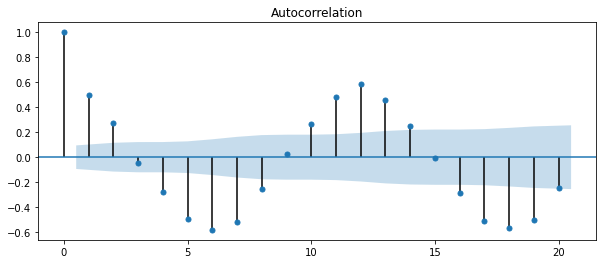

In [ ]:
plot_acf(serie3, lags=20)
plt.show()

Melhor AIC: 1337.922 = (9,0,0)

### **Análise dos Resíduos**

In [ ]:
residuos = resultado.resid
residuos

1985-01-31    0.915752
1985-02-28    1.009211
1985-03-31    0.621481
1985-04-30   -1.541718
1985-05-31    0.749305
                ...   
2020-08-31   -0.237105
2020-09-30   -2.025519
2020-10-31    0.328071
2020-11-30   -0.775253
2020-12-31    0.173566
Freq: M, Length: 432, dtype: float64

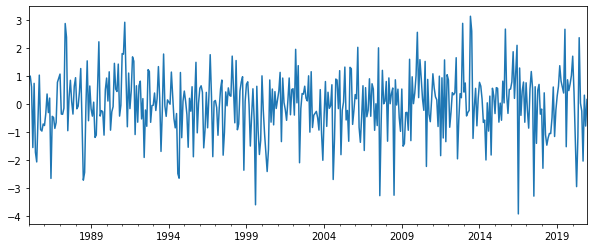

In [ ]:
residuos.plot()
plt.show()

**Normalidade**

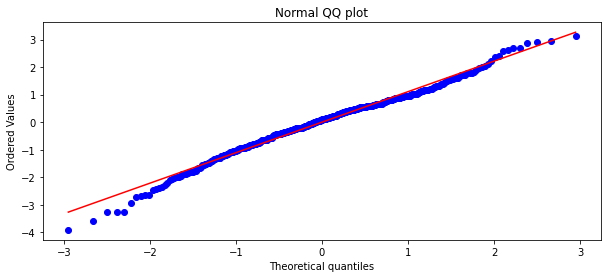

In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [ ]:
e, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9866634011268616
p-valor: 0.0005368239944800735


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


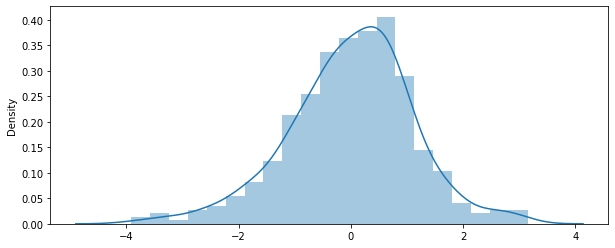

In [ ]:
import seaborn as sns
sns.distplot(residuos);

**Autocorrelação**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

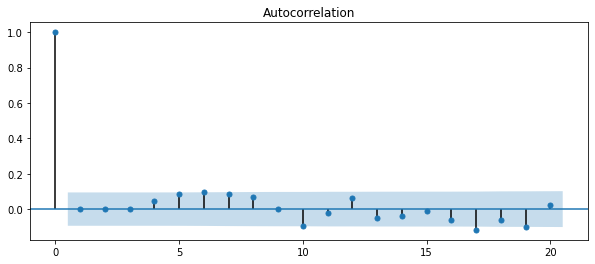

In [ ]:
plot_acf(residuos, lags=20)
plt.show()

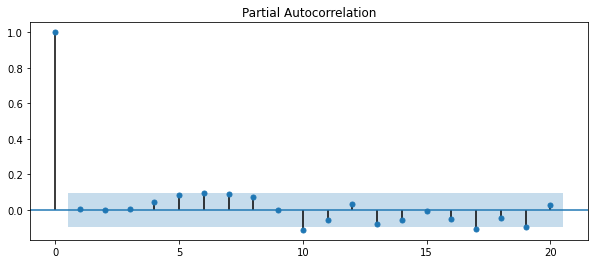

In [ ]:
plot_pacf(residuos, lags=20)
plt.show()

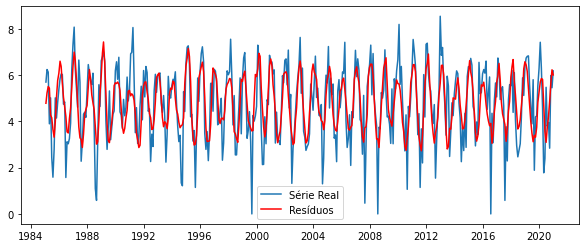

In [ ]:
plt.plot(serie3, label='Série Real')
plt.plot(serie3-residuos,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

**Previsão**

In [ ]:
resultado.fittedvalues

1985-01-31    4.781240
1985-02-28    5.230184
1985-03-31    5.505444
1985-04-30    5.434715
1985-05-31    4.266644
                ...   
2020-08-31    4.197123
2020-09-30    4.865259
2020-10-31    5.652421
2020-11-30    6.227736
2020-12-31    6.006530
Freq: M, Length: 432, dtype: float64

In [ ]:
previsao = resultado.predict(431, end=443)
previsao

2020-12-31    6.006530
2021-01-31    5.402736
2021-02-28    5.501542
2021-03-31    5.218821
2021-04-30    4.775555
2021-05-31    4.053942
2021-06-30    3.847759
2021-07-31    3.911281
2021-08-31    4.199240
2021-09-30    4.517323
2021-10-31    4.889530
2021-11-30    5.264170
2021-12-31    5.514002
Freq: M, dtype: float64

In [ ]:
previsao2 = resultado.forecast(12)
previsao2

(array([5.40273611, 5.50154156, 5.21882127, 4.77555495, 4.05394158,
        3.84775909, 3.91128063, 4.19923952, 4.51732266, 4.88953006,
        5.26417041, 5.51400158]),
 array([1.10674341, 1.11907366, 1.12322821, 1.12746156, 1.13530242,
        1.16413083, 1.21391661, 1.2687154 , 1.27661459, 1.27753115,
        1.28910602, 1.31213974]),
 array([[3.2335589 , 7.57191333],
        [3.3081975 , 7.69488563],
        [3.01733444, 7.4203081 ],
        [2.56577089, 6.98533901],
        [1.82878974, 6.27909343],
        [1.56610459, 6.12941359],
        [1.53204779, 6.29051346],
        [1.71260303, 6.68587601],
        [2.01520404, 7.01944128],
        [2.38561501, 7.39344512],
        [2.73756905, 7.79077178],
        [2.94225494, 8.08574821]]))

In [ ]:
previsao2[0]

array([5.40273611, 5.50154156, 5.21882127, 4.77555495, 4.05394158,
       3.84775909, 3.91128063, 4.19923952, 4.51732266, 4.88953006,
       5.26417041, 5.51400158])

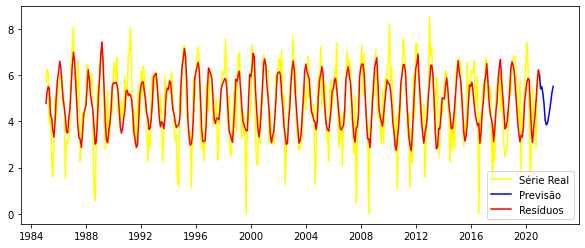

In [ ]:
plt.plot(serie3,color='yellow', label='Série Real')
plt.plot(previsao,color='blue', label='Previsão')
plt.plot(serie3-residuos,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

In [ ]:
prev_escala = pd.DataFrame(previsao ** 3, columns=['Previsão_AR'])
prev_escala

,Previsão_AR
2020-12-31,216.706029
2021-01-31,157.703477
2021-02-28,166.514936
2021-03-31,142.140314
2021-04-30,108.910948
2021-05-31,66.624269
2021-06-30,56.967035
2021-07-31,59.835225
2021-08-31,74.047762
2021-09-30,92.181408


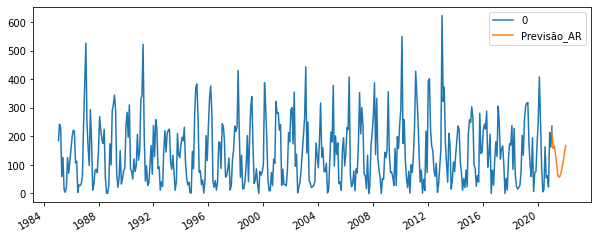

In [ ]:
pd.concat([serie,prev_escala]).plot();

## **Modelo MA**

Modelo arima:(p,d,q)

Modelo ma: (0,0,q)

In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [41]:
modelo_ma = ARIMA(serie3, order = (0,0,8))

In [42]:
resultado_ma = modelo_ma.fit()
print(resultado_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  432
Model:                 ARIMA(0, 0, 8)   Log Likelihood                -695.848
Date:                Sun, 26 Mar 2023   AIC                           1411.696
Time:                        01:28:54   BIC                           1452.381
Sample:                    01-31-1985   HQIC                          1427.758
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7863      0.028    172.577      0.000       4.732       4.841
ma.L1          0.3130      0.051      6.129      0.000       0.213       0.413
ma.L2          0.2280      0.051      4.501      0.0

Modelo AR: AIC = 1337.922 (9,0,0)

Modelo MA: AIC = 1411.696 (0,0,8)

### **Análise dos Resíduos**

In [ ]:
residuos_ma = resultado_ma.resid

In [ ]:
residuos_ma.plot()
plt.show()

**Normalidade**

In [ ]:
stats.probplot(residuos_ma, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [ ]:
e, p = stats.shapiro(residuos_ma)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

In [ ]:
import seaborn as sns
sns.distplot(residuos_ma);

**Autocorrelação**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
plot_acf(residuos_ma, lags=30)
plt.show()

In [ ]:
plot_pacf(residuos_ma, lags=30)
plt.show()

In [ ]:
plt.plot(serie3, label='Série Real')
plt.plot(serie3-residuos_ma,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

**Previsão**

In [ ]:
resultado_ma.fittedvalues

In [ ]:
previsao_ma = resultado_ma.predict(start=431, end=443)
previsao_ma

In [ ]:
plt.plot(serie3,color='yellow', label='Série Real')
plt.plot(previsao_ma,color='blue', label='Previsão')
plt.plot(serie3-residuos_ma,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

In [ ]:
prev_escala_ma = pd.DataFrame(previsao_ma ** 3, columns=['Previsão_MA'])
prev_escala_ma

In [ ]:
pd.concat([serie,prev_escala_ma]).plot();

## **Modelo ARMA**

Modelo arima:(p,d,q)

Modelo arma: (p,0,q)

Modelo AR: AIC = 1337.922 (9,0,0)

Modelo MA: AIC = 1411.696 (0,0,8)

In [43]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
modelo_arma = ARIMA(serie3, order = (10,0,2))

In [ ]:
resultado_arma = modelo_arma.fit()
print(resultado_arma.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  432
Model:                    ARMA(10, 2)   Log Likelihood                -622.883
Method:                       css-mle   S.D. of innovations              1.012
Date:                Sun, 22 Aug 2021   AIC                           1273.766
Time:                        21:10:20   BIC                           1330.724
Sample:                    01-31-1985   HQIC                          1296.252
                         - 12-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7801      0.043    112.284      0.000       4.697       4.864
ar.L1.y        1.7143      0.010    174.771      0.000       1.695       1.734
ar.L2.y       -1.0073      0.013    -76.505      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


Modelo AR: AIC = 1337.922 (9,0,0)

Modelo MA: AIC = 1411.696 (0,0,8)

Modelo ARMA: Melhor AIC = 1273.766 (10,0,2)

### **Análise dos Resíduos**

In [ ]:
residuos_arma = resultado_arma.resid

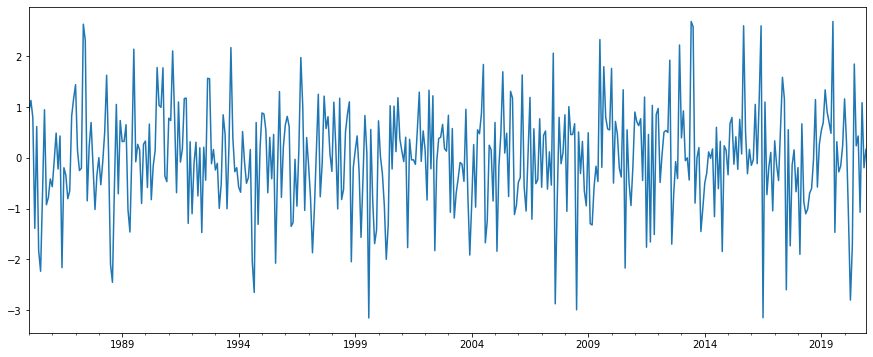

In [ ]:
residuos_arma.plot()
plt.show()

**Normalidade**

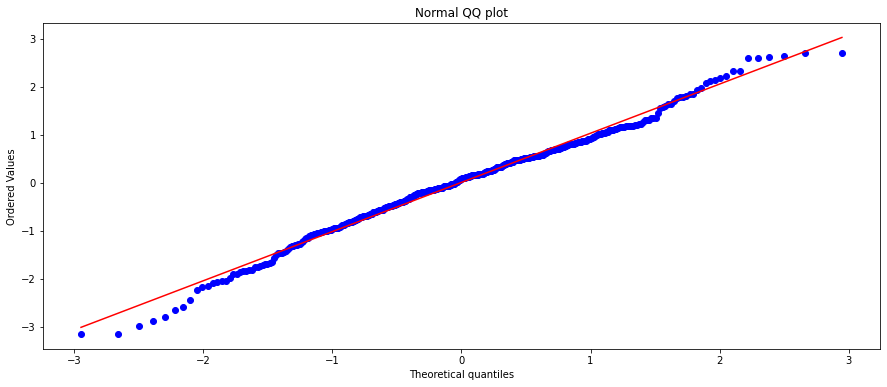

In [ ]:
stats.probplot(residuos_arma, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [ ]:
e, p = stats.shapiro(residuos_arma)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9905464053153992
p-valor: 0.00716750742867589


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


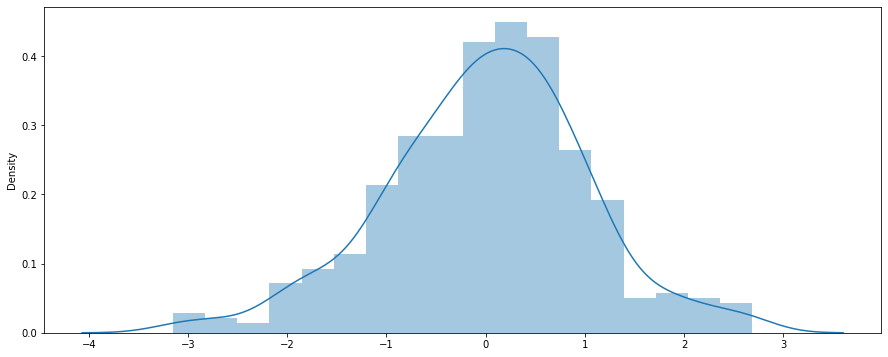

In [ ]:
import seaborn as sns
sns.distplot(residuos_arma);

**Autocorrelação**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

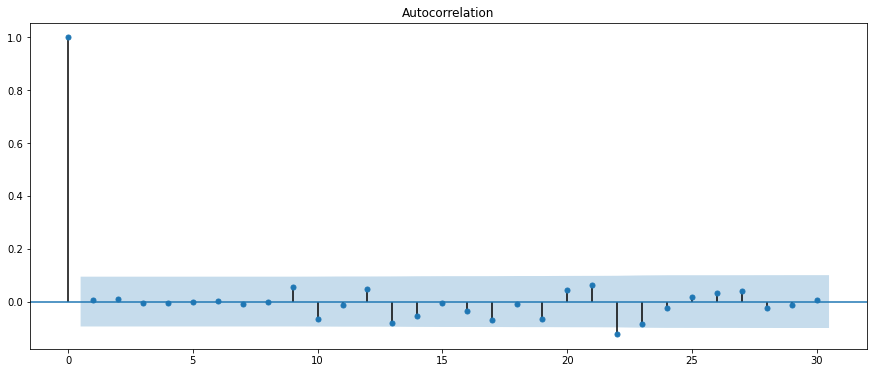

In [ ]:
plot_acf(residuos_arma, lags=30)
plt.show()

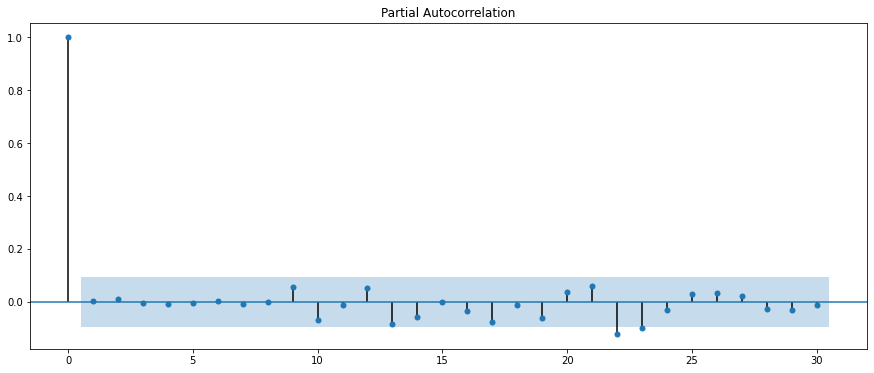

In [ ]:
plot_pacf(residuos_arma, lags=30)
plt.show()

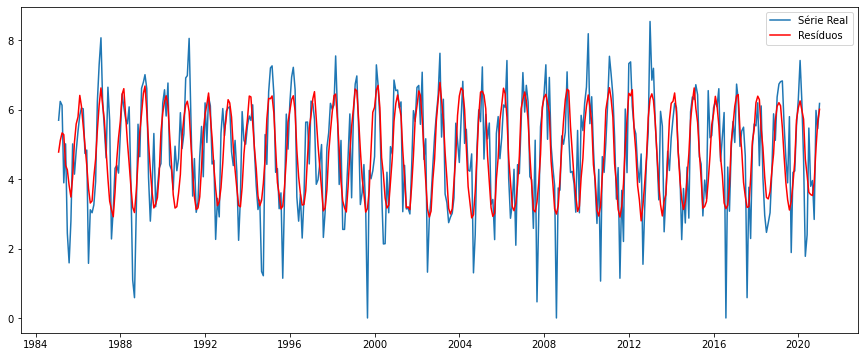

In [ ]:
plt.plot(serie3, label='Série Real')
plt.plot(serie3-residuos_arma,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

**Previsão**

In [ ]:
resultado_arma.fittedvalues

1985-01-31    4.780065
1985-02-28    5.106486
1985-03-31    5.330761
1985-04-30    5.281074
1985-05-31    4.397872
                ...   
2020-08-31    3.527863
2020-09-30    3.910729
2020-10-31    4.891392
2020-11-30    5.646454
2020-12-31    6.010965
Freq: M, Length: 432, dtype: float64

In [ ]:
previsao_arma = resultado_arma.predict(start=431, end=455)
previsao_arma

2020-12-31    6.010965
2021-01-31    5.974197
2021-02-28    6.226821
2021-03-31    5.579999
2021-04-30    4.840564
2021-05-31    3.833017
2021-06-30    3.512488
2021-07-31    3.230551
2021-08-31    3.487887
2021-09-30    3.993668
2021-10-31    4.815627
2021-11-30    5.580483
2021-12-31    6.146387
2022-01-31    6.306524
2022-02-28    6.103476
2022-03-31    5.519733
2022-04-30    4.751018
2022-05-31    3.975577
2022-06-30    3.427976
2022-07-31    3.239045
2022-08-31    3.466444
2022-09-30    4.040862
2022-10-31    4.818018
2022-11-30    5.582564
2022-12-31    6.133365
Freq: M, dtype: float64

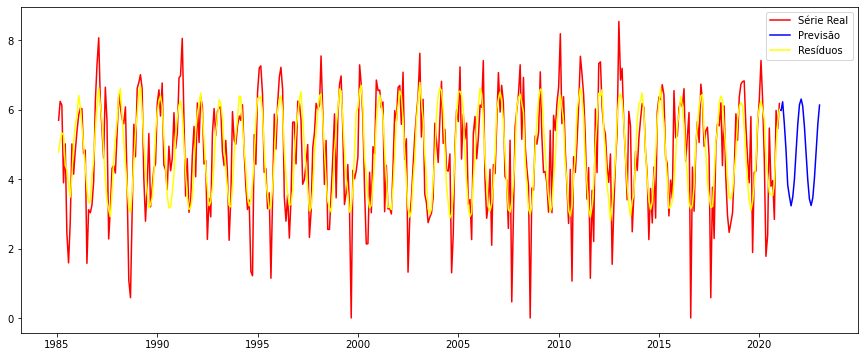

In [ ]:
plt.plot(serie3,color='red', label='Série Real')
plt.plot(previsao_arma,color='blue', label='Previsão')
plt.plot(serie3-residuos_arma,color='yellow', label='Resíduos')
plt.legend(loc='best')
plt.show()

In [ ]:
prev_escala_arma = pd.DataFrame(previsao_arma ** 3, columns=['Previsão_ARMA'])
prev_escala_arma

,Previsão_ARMA
2020-12-31,217.186396
2021-01-31,213.225265
2021-02-28,241.434443
2021-03-31,173.741006
2021-04-30,113.419526
2021-05-31,56.314777
2021-06-30,43.335564
2021-07-31,33.715526
2021-08-31,42.431400
2021-09-30,63.696527


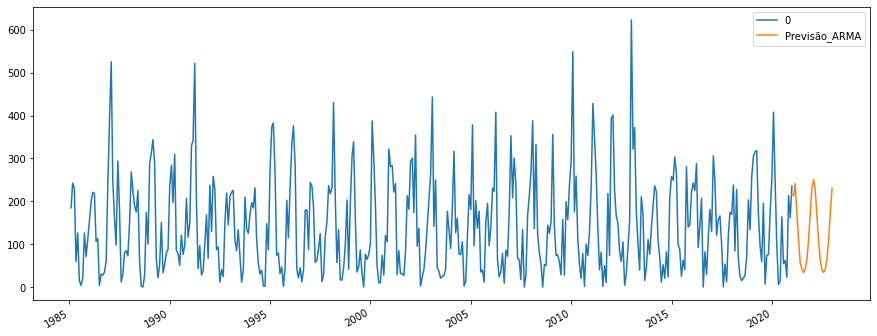

In [ ]:
pd.concat([serie,prev_escala_arma]).plot();

## **Modelo ARIMA**

Modelo arima:(p,d,q)

Modelo AR: AIC = 1337.922 (9,0,0)

Modelo MA: Melhor AIC = 1411.696 (0,0,8)

Modelo ARMA: Melhor AIC = 1273.766 (10,0,2)

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
modelo_arima = ARIMA(serie3, order = (10,1,2))

In [47]:
resultado_arima = modelo_arima.fit()
print(resultado_arima.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  432
Model:                ARIMA(10, 1, 2)   Log Likelihood                -649.864
Date:                Sun, 26 Mar 2023   AIC                           1325.728
Time:                        01:29:46   BIC                           1378.587
Sample:                    01-31-1985   HQIC                          1346.599
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7070      0.064     11.030      0.000       0.581       0.833
ar.L2         -0.2214      0.066     -3.358      0.001      -0.351      -0.092
ar.L3         -0.3107      0.074     -4.222      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Modelo AR: Melhor AIC = 1339.919 (10,0,0)

Modelo MA: Melhor AIC = 1411.696 (0,0,8)

Modelo ARMA: Melhor AIC = 1273.766 (10,0,2)

Modelo ARIMA: Melhor AIC = 1319.230 (10,1,2)

### **Análise dos Resíduos**

In [ ]:
residuos_arima = resultado_arima.resid

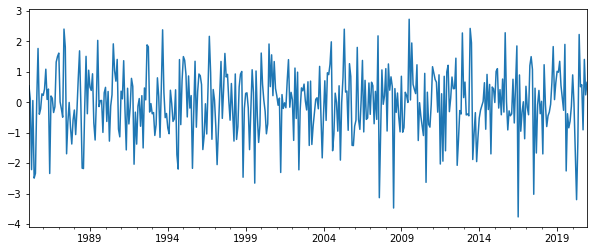

In [ ]:
residuos_arima.plot()
plt.show()

**Normalidade**

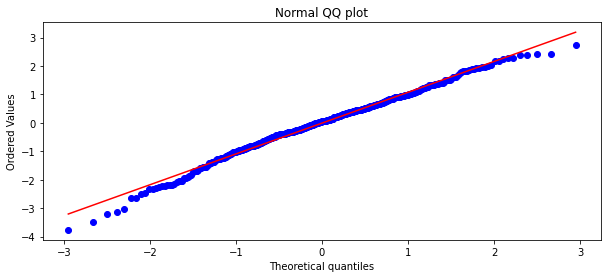

In [ ]:
stats.probplot(residuos_arima, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [ ]:
e, p = stats.shapiro(residuos_arima)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9901847243309021
p-valor: 0.005651767831295729


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


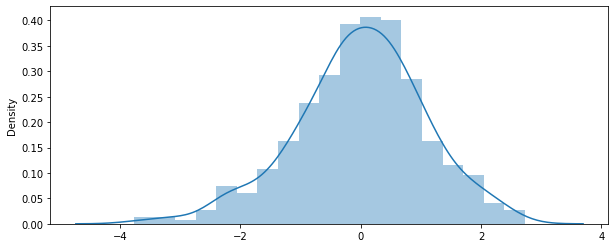

In [ ]:
import seaborn as sns
sns.distplot(residuos_arima);

**Autocorrelação**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

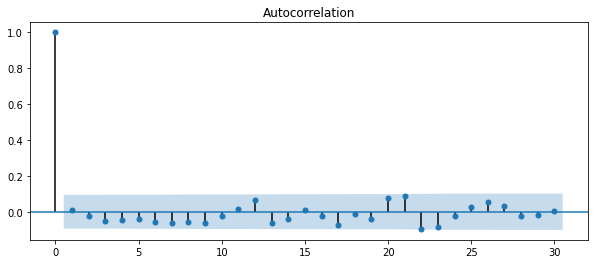

In [ ]:
plot_acf(residuos_arima, lags=30)
plt.show()

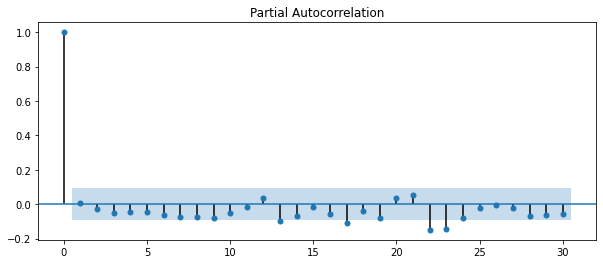

In [ ]:
plot_pacf(residuos_arima, lags=30)
plt.show()

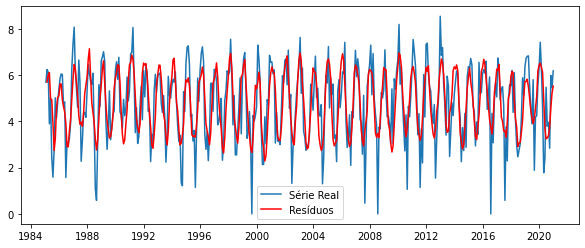

In [ ]:
plt.plot(serie3, label='Série Real')
plt.plot(serie3-residuos_arima,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

**Previsão**

In [ ]:
resultado_arima.fittedvalues

1985-02-28    0.001036
1985-03-31   -0.226093
1985-04-30   -0.022013
1985-05-31    1.064870
1985-06-30   -0.080806
                ...   
2020-08-31   -0.410946
2020-09-30   -0.215438
2020-10-31    1.731965
2020-11-30   -0.772092
2020-12-31    0.073172
Freq: M, Length: 431, dtype: float64

In [ ]:
previsao_arima = resultado_arima.predict(start=430, end=443)
previsao_arima

2020-11-30   -0.772092
2020-12-31    0.073172
2021-01-31   -0.654503
2021-02-28    0.729933
2021-03-31   -0.197402
2021-04-30   -0.917342
2021-05-31   -1.097395
2021-06-30   -0.494859
2021-07-31   -0.012697
2021-08-31    0.035124
2021-09-30    0.420895
2021-10-31    0.717172
2021-11-30    0.953480
2021-12-31    0.590442
Freq: M, dtype: float64

In [ ]:
# Linha TESTE
prev_arima = pd.DataFrame(previsao_arima, columns=['Previsão_ARIMA'])
prev_arima

,Previsão_ARIMA
2020-11-30,-0.772092
2020-12-31,0.073172
2021-01-31,-0.654503
2021-02-28,0.729933
2021-03-31,-0.197402
2021-04-30,-0.917342
2021-05-31,-1.097395
2021-06-30,-0.494859
2021-07-31,-0.012697
2021-08-31,0.035124


In [ ]:
len(prev_arima['Previsão_ARIMA'])

14

In [ ]:
prev_arima['Previsão_ARIMA'][-1]

0.5904423261006768

In [ ]:
soma = np.cumsum(prev_arima['Previsão_ARIMA'][::-1])
soma

2021-12-31    0.590442
2021-11-30    1.543922
2021-10-31    2.261094
2021-09-30    2.681989
2021-08-31    2.717114
2021-07-31    2.704416
2021-06-30    2.209557
2021-05-31    1.112163
2021-04-30    0.194821
2021-03-31   -0.002581
2021-02-28    0.727352
2021-01-31    0.072849
2020-12-31    0.146022
2020-11-30   -0.626070
Freq: -1M, Name: Previsão_ARIMA, dtype: float64

In [ ]:
reversao = []
for i in range(1,len(prev_arima['Previsão_ARIMA'])):
  reversao.append (prev_arima['Previsão_ARIMA'][-1]-soma[-i])
reversao.append(prev_arima['Previsão_ARIMA'][-1])
print(reversao)

# LINHA TESTE
#arima_log_diff_rev = []
#v_prev = 0
#for v in prev_arima['Previsão_ARIMA']:
    #v_prev += v
    #arima_log_diff_rev.append(v_prev)


#prev_arima['Previsão_ARIMA']=(prev_arima['Previsão_ARIMA'].cumsum())*ultimo
#prev_arima

[1.2165125088622193, 0.444420754155757, 0.5175932327906714, -0.13690936177452984, 0.5930235440628719, 0.3956214059132356, -0.5217205555453543, -1.6191150749218755, -2.1139739556818844, -2.1266711977507304, -2.0915468804477717, -1.6706520872039328, -0.953480147870249, 0.5904423261006768]


In [ ]:
#df['energy']=(np.exp(df['energy'].cumsum())*last_energy)
ultimo = prev_arima['Previsão_ARIMA'].iloc[-1]
prev_arima['Previsão_ARIMA']=(prev_arima['Previsão_ARIMA'].cumsum()*ultimo)
prev_arima

In [ ]:
previsao_arima2 = resultado_arima.forecast(24)
previsao_arima2[0]

array([5.52559313, 6.25552604, 6.0581239 , 5.14078194, 4.04338742,
       3.54852854, 3.53583129, 3.57095561, 3.9918504 , 4.70902234,
       5.66250249, 6.25294482, 6.39454539, 6.15926012, 5.67928236,
       4.96875442, 4.19058406, 3.60639146, 3.40719593, 3.61847989,
       4.13598943, 4.84684773, 5.59064945, 6.16532232])

In [ ]:
prev_escala_arima = pd.DataFrame(previsao_arima2[0] ** 3, columns=['Previsão_ARIMA'])
prev_escala_arima

,Previsão_ARIMA
0,168.708401
1,244.788780
2,222.338388
3,135.858729
4,66.105267
5,44.683266
6,44.205327
7,45.535840
8,63.609616
9,104.422059


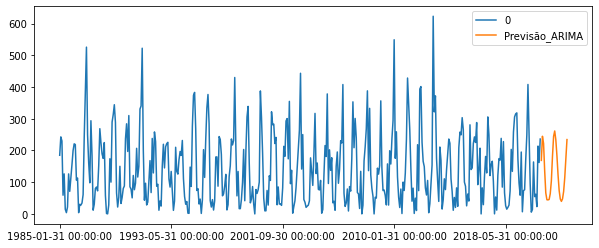

In [ ]:
pd.concat([serie,prev_escala_arima]).plot();

## **Modelo AUTO ARIMA**

Modelo arima:(p,d,q)

Modelo SARIMA: (p,d,q)(P,D,Q)

Modelo AR: Melhor AIC = 1337.922 = (9,0,0)

Modelo MA: Melhor AIC = 1411.696 (0,0,8)

Modelo ARMA: Melhor AIC = 1273.766 (10,0,2)

Modelo ARIMA: Melhor AIC = 1319.230 (10,1,2)

In [48]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.8 MB/s eta 0:00:00


In [49]:
from pmdarima.arima import auto_arima

In [ ]:
### AUTOARIMA
modelo_auto = auto_arima(serie3, trace = True, stepwise = False, seasonal=True, max_p=10, max_q=10,
                          max_P=4, max_Q=4, start_p=0, start_q=0, start_P=0, start_Q=0, m=12,)

# Trace: apresenta no console a lista dos modelos.
# stepwise: seleção gradual(processo mais rápido, porém menos minucioso).
# m: período sazonal (neste caso mensal).
# Interessante dobrar as ordens máximas: max.p = 10, max.q = 10, max.P = 4, max.Q = 4

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1618.370, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1503.636, Time=0.22 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1474.263, Time=0.76 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=1437.044, Time=2.12 sec
 ARIMA(0,0,0)(0,0,4)[12] intercept   : AIC=1419.293, Time=4.18 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1427.651, Time=0.51 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=4.63 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1270.589, Time=10.09 sec
 ARIMA(0,0,0)(1,0,4)[12] intercept   : AIC=inf, Time=20.42 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1385.579, Time=2.02 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.46 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.43 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=11.87 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=6.27 sec
 ARIMA(0,0,0)(3,0,1)[12] in

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(0,0,0)(4,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 709, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line

 ARIMA(0,0,0)(4,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1534.551, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1464.951, Time=0.39 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1448.732, Time=1.00 sec
 ARIMA(0,0,1)(0,0,3)[12] intercept   : AIC=1418.891, Time=2.56 sec
 ARIMA(0,0,1)(0,0,4)[12] intercept   : AIC=1406.458, Time=5.24 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1419.367, Time=0.80 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.33 sec
 ARIMA(0,0,1)(1,0,3)[12] intercept   : AIC=1279.037, Time=11.16 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=1383.694, Time=2.51 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=4.08 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=5.84 sec
 ARIMA(0,0,1)(3,0,0)[12] intercept   : AIC=1340.191, Time=7.42 sec
 ARIMA(0,0,1)(3,0,1)[12] intercept   : AIC=inf, Time=12.05 sec
 ARIMA(0,0,1)(4,0,0)[12]

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,0,1)(2,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 709, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line

 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(3,0,0)[12] intercept   : AIC=1344.840, Time=7.97 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1486.602, Time=0.31 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=1439.061, Time=0.80 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=1428.745, Time=2.57 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=1409.704, Time=1.98 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.00 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=1380.113, Time=5.37 sec
 ARIMA(1,0,3)(0,0,0)[12] intercept   : AIC=1487.763, Time=0.46 sec
 ARIMA(1,0,3)(0,0,1)[12] intercept   : AIC=1440.927, Time=1.68 sec
 ARIMA(1,0,3)(1,0,0)[12] intercept   : AIC=1409.345, Time=2.05 sec
 ARIMA(1,0,4)(0,0,0)[12] intercept   : AIC=1452.326, Time=1.34 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1499.659, Time=0.17 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1447.261, Time=0.46 sec
 ARIMA(2,0,0)(0,0,2)[12] intercept   : AIC=1435.523, Time=1.37 sec
 ARIMA

In [ ]:
print(modelo_auto.aic())

Modelo AR: Melhor AIC = 1339.919 (10,0,0)

Modelo MA: Melhor AIC = 1411.696 (0,0,8)

Modelo ARMA: Melhor AIC = 1273.766 (10,0,2)

Modelo ARIMA: Melhor AIC = 1319.230 (10,1,2)

Modelo_AUTOARIMA: AIC=1270.5894 ARIMA(0,0,0)(1,0,3)

In [ ]:
resultado_auto = modelo_auto.fit(serie3)
print(resultado_auto.summary())

### **Análise dos Resíduos**

In [ ]:
residuos_auto = resultado_auto.resid
residuos_auto()

In [ ]:
plt.plot(residuos_auto())
plt.show()

**Normalidade**

In [ ]:
stats.probplot(residuos_auto(), dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [ ]:
e, p = stats.shapiro(residuos_auto())
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

In [ ]:
import seaborn as sns
sns.distplot(residuos_auto());

**Autocorrelação**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
plot_acf(residuos_auto(), lags=30)
plt.show()

In [ ]:
plot_pacf(residuos_auto(), lags=30)
plt.show()

In [ ]:
plt.plot(serie3, label='Série Real')
plt.plot(serie3-residuos_auto(),color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

**Previsão**

In [ ]:
previsao_auto = resultado_auto.predict(n_periods=48)
previsao_auto

In [ ]:
prev_escala_auto = pd.DataFrame(previsao_auto ** 3, columns=['Previsão_SARIMA'])
prev_escala_auto

In [ ]:
pd.concat([serie,prev_escala_auto]).plot();

## **Análise final do projeto**

**COMPARAÇÃO DOS MODELOS**

Modelo AR: Melhor AIC = 1339.919 (10,0,0)

Modelo MA: Melhor AIC = 1411.696 (0,0,8)

Modelo ARMA: Melhor AIC = 1273.766 (10,0,2)

Modelo ARIMA: Melhor AIC = 1319.230 (10,1,2)

**Modelo_SARIMA (AutoArima): AIC=1270.5894 ARIMA(0,0,0)(1,0,3)**

**DESEMPENHO DOS MODELOS**

In [ ]:
# Lista com valores reais de 2021
lista = [373.3, 174.1, 137.8, 55.7]
valores_reais = pd.DataFrame(lista, columns = ['valores reais'])
print(valores_reais)

In [ ]:
auto = prev_escala_auto.iloc[0:4]
auto

In [ ]:
desempenho = pd.concat([valores_reais, auto],axis=1)
desempenho

In [ ]:
ar = prev_escala.iloc[1:5]
ar

In [ ]:
pd.DataFrame.reset_index(ar, drop=True, inplace=True)
ar

In [ ]:
ma = prev_escala_ma.iloc[1:5]
ma

In [ ]:
pd.DataFrame.reset_index(ma, drop=True, inplace=True)
ma

In [ ]:
arma = prev_escala_arma.iloc[1:5]
arma

In [ ]:
pd.DataFrame.reset_index(arma, drop=True, inplace=True)
arma

In [ ]:
arima = prev_escala_arima.iloc[0:4]
arima

In [ ]:
desempenho = pd.concat([desempenho, ar, ma, arma, arima],axis=1)
desempenho

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

**ERRO MÉDIO ABSOLUTO (MAE)**

In [ ]:
print('ERRO MÉDIO ABSOLUTO (MAE)')
mae_sarima = mean_absolute_error(desempenho['valores reais'], desempenho['Previsão_SARIMA'])
print('SARIMA: {:.2f}'.format(mae_sarima))
mae_ar = mean_absolute_error(desempenho['valores reais'], desempenho['Previsão_AR'])
print('AR: {:.2f}'.format(mae_ar))
mae_ma = mean_absolute_error(desempenho['valores reais'], desempenho['Previsão_MA'])
print('MA: {:.2f}'.format(mae_ma))
mae_arma = mean_absolute_error(desempenho['valores reais'], desempenho['Previsão_ARMA'])
print('ARMA: {:.2f}'.format(mae_arma))
mae_arima = mean_absolute_error(desempenho['valores reais'], desempenho['Previsão_ARIMA'])
print('ARIMA: {:.2f}'.format(mae_arima))

**ERRO QUADRÁTICO MÉDIO (MSE)**

In [ ]:
print('ERRO QUADRÁTICO MÉDIO (MSE)')
mse_sarima = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_SARIMA'])
print('SARIMA: {:.2f}'.format(mse_sarima))
mse_ar = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_AR'])
print('AR: {:.2f}'.format(mse_ar))
mse_ma = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_MA'])
print('MA: {:.2f}'.format(mse_ma))
mse_arma = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_ARMA'])
print('ARMA: {:.2f}'.format(mse_arma))
mse_arima = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_ARIMA'])
print('ARIMA: {:.2f}'.format(mse_arima))

**RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)**

In [ ]:
print('RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)')
rmse_sarima = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_SARIMA'], squared=False)
print('SARIMA: {:.2f}'.format(rmse_sarima))
rmse_ar = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_AR'], squared=False)
print('AR: {:.2f}'.format(rmse_ar))
rmse_ma = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_MA'], squared=False)
print('MA: {:.2f}'.format(rmse_ma))
rmse_arma = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_ARMA'], squared=False)
print('ARMA: {:.2f}'.format(rmse_arma))
rmse_arima = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_ARIMA'], squared=False)
print('ARIMA: {:.2f}'.format(rmse_arima))

**Sugestões de Estudos:**

1) Criar uma série com a data final até dezembro de 2019.

2) Fazer todo o estudo com o dataset elnino do Python.

https://www.statsmodels.org/devel/datasets/index.html 

In [ ]:
import statsmodels.api as sm
sm.datasets.elnino.load_pandas().data